In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [49]:
# Carregando dados
ticker = "BBAS3.SA"
data = yf.Ticker(ticker).history(period="2y")

# Removendo colunas desnecessárias
del data["Dividends"]
del data["Stock Splits"]

# Limpeza de dados
data.dropna(inplace=True)

# Definindo X e y
X = data['Open'].values.reshape(-1, 1)
y = data['High'].values.reshape(-1, 1)


In [50]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [51]:
# Implementação da Floresta Aleatória
modelo_floresta = RandomForestRegressor(n_estimators=100, random_state=0)
modelo_floresta.fit(X_train, y_train)

c:\Users\55869\OneDrive\Área de Trabalho\TRABALHO_IA\chatbot-autismo\cuda\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [52]:
# Previsões
y_pred = modelo_floresta.predict(X_test)
y_pred

array([16.53645011, 23.33148381, 22.63756199, 27.5193195 , 24.05494666,
       15.48410859, 28.58398622, 22.390373  , 19.1586825 , 18.08965535,
       24.50805366, 23.91210308, 22.81441773, 28.63358401, 17.91756079,
       22.51869462, 27.34121554, 28.26977576, 18.301518  , 18.05244018,
       19.86589357, 26.57416684, 23.85505064, 16.01575161, 18.09509873,
       28.54154137, 15.94006972, 27.47385654, 15.68506699, 22.51869462,
       27.509476  , 15.71775877, 15.68506699, 18.25722764, 26.33248653,
       26.20027789, 22.69969187, 27.18074202, 22.53895903, 23.53152209,
       23.45007181, 17.56273437, 26.96682799, 20.56434471, 19.14079485,
       14.50602258, 20.48538395, 23.7094982 , 28.34655993, 15.74900025,
       26.50081168, 18.301518  , 22.51330967, 18.0697006 , 15.86552038,
       15.26679133, 23.85505064, 17.75569029, 20.56434471, 22.26927603,
       17.86636475, 26.57262098, 27.09234285, 27.6629099 , 22.82481102,
       20.06169069, 15.08872838, 28.62611633, 22.40920155, 19.42

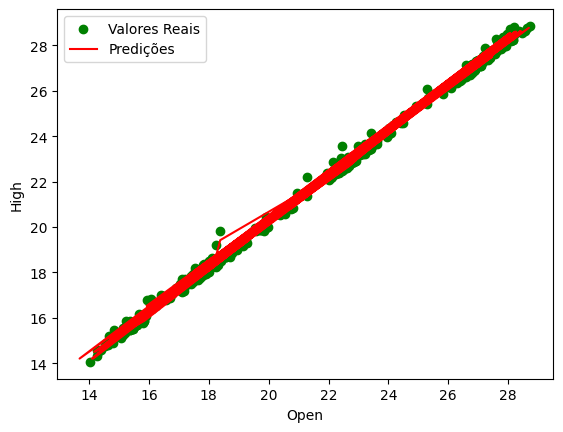

In [53]:
# Visualizando previsões
plt.scatter(X_train, y_train, color='green', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Predições')
plt.xlabel('Open')
plt.ylabel('High')
plt.legend()
plt.show()

In [54]:
# Avaliação do modelo
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [55]:
# Exibindo métricas
print(f"Coeficiente de Determinação (R2): {r2}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape}%")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")

Coeficiente de Determinação (R2): 0.9978146007956501
Erro Percentual Absoluto Médio (MAPE): 0.7510370473010247%
Erro Médio Absoluto (MAE): 0.15913820102489387
Erro Quadrático Médio (MSE): 0.04438546247646727


In [56]:
# Últimos valores conhecidos
last_known_high = data.iloc[-3]['Open'].reshape(1, -1) # Último valor de 'Open' para prever o próximo 'High'

predicted_prices_high = []

# Prever os próximos 7 dias
for _ in range(3):
    next_price_high = modelo_floresta.predict(last_known_high)
    
    predicted_prices_high.append(next_price_high[0])
    
    # Atualizar last_known_prices para a próxima previsão
    last_known_high = next_price_high.reshape(1, -1)

print('Predicted prices for the next 3 days:', predicted_prices_high)

Predicted prices for the next 3 days: [np.float64(26.778820749813256), np.float64(26.897870521015204), np.float64(26.93623012549389)]
